## ProjF5 - Final Model

Use this document as a template to provide the evaluation of your final model. You are welcome to go in as much depth as needed.

Make sure you keep the sections specified in this template, but you are welcome to add more cells with your code or explanation as needed.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import cv2
from collections import defaultdict
import pandas as pd

### 1. Load and Prepare Data

This should illustrate your code for loading the dataset and the split into training, validation and testing. You can add steps like pre-processing if needed.

In [2]:
#Dataset loading and dataset extraction
drive.mount('/content/drive')

train_dir = r"/content/drive/MyDrive/Colab Notebooks/Dataset/Train/Train/"
test_dir = r"/content/drive/MyDrive/Colab Notebooks/Dataset/Test/Test/"
validation_dir = r"/content/drive/MyDrive/Colab Notebooks/Dataset/Validation/Validation/"

data = ImageDataGenerator(rescale=1./255)

trn_data = data.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='categorical')
tst_data = data.flow_from_directory(test_dir, target_size=(150, 150), batch_size=20, class_mode='categorical')
vld_data = data.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='categorical')


Mounted at /content/drive
Found 1329 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


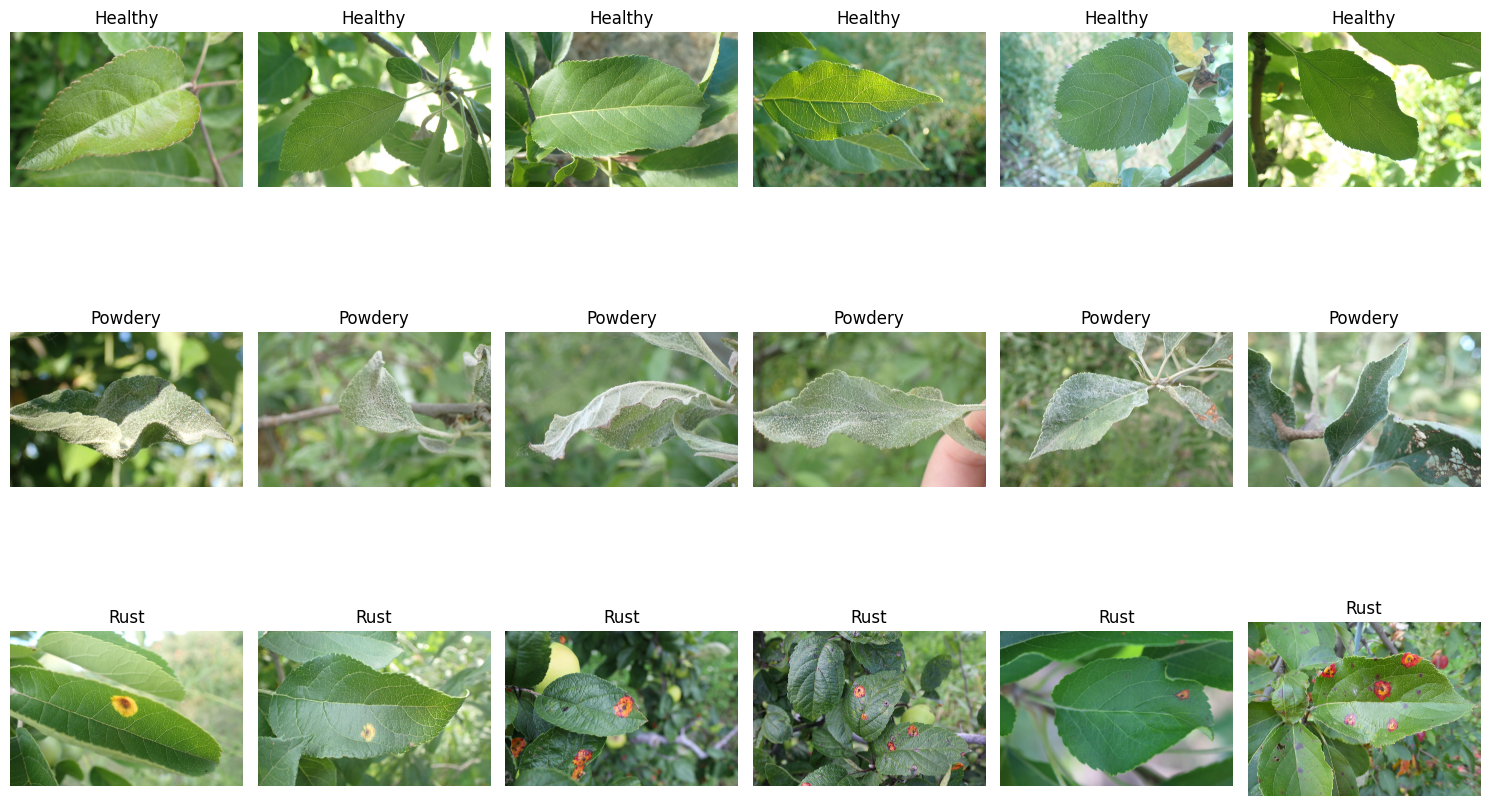

In [3]:
# Created a plot to visualize the various classes withing the dataset.
def show_img(gen, n=6):
    cat = list(gen.class_indices.keys())
    fig, x = plt.subplots(len(cat), n, figsize=(15, 10))
    for i, k in enumerate(cat):
        dir = gen.directory + k + "/"
        file = os.listdir(dir)[:n]
        for j, file in enumerate(file):
            img = plt.imread(dir + file)
            x[i, j].imshow(img)
            x[i, j].set_title(k)
            x[i, j].axis('off')
    plt.tight_layout()
    plt.show()

show_img(trn_data)

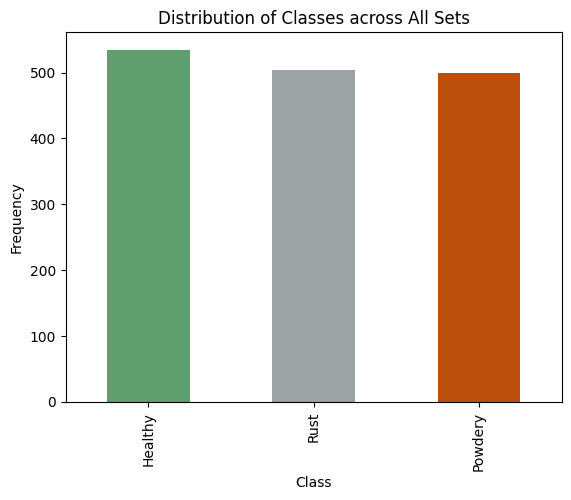

In [4]:
# Bar plot to see the classes distribution in the data set.

color_palette = ['#5F9E6E', '#9DA3A4', '#BB4F0D']
trn_labels = trn_data.classes
valid_labels = vld_data.classes
test_labels = tst_data.classes
all_lbl = np.concatenate([trn_labels, valid_labels, test_labels])
labels = {v: k for k, v in trn_data.class_indices.items()}
all_labels_names = [labels[label] for label in all_lbl]
label_distribtn = pd.DataFrame(all_labels_names, columns=['Label'])
label_distribtn_cnt = label_distribtn['Label'].value_counts()
label_distribtn_cnt.plot(kind='bar', color=color_palette)
plt.title('Distribution of Classes across All Sets')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


### 2. Prepare your Final Model

Here you can have your code to either train (e.g., if you are building it from scratch) your model. These steps may require you to use other packages or python files. You can just call them here. You don't have to include them in your submission. Remember that we will be looking at the saved outputs in the notebooked and we will not run the entire notebook.

In [5]:
# Creating the Final Model (Inception V3)
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
base_model = InceptionV3(weights='imagenet', include_top=False, input_tensor=Input(shape=(150, 150, 3)))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(trn_data.class_indices), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


87910968/87910968 [==============================] - 4s 0us/step


In [6]:
# Training and testing the model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import preprocess_input

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.1
)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(299, 299),
    batch_size=20,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(299, 299),
    batch_size=20,
    class_mode='categorical',
    subset='validation'
)
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(299, 299),
    batch_size=20,
    class_mode='categorical',
    subset='training'
)


Found 1197 images belonging to 3 classes.
Found 132 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [7]:
#Model fitting
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/10
59/59 [==============================] - 437s 7s/step - loss: 0.3886 - accuracy: 0.8734 - val_loss: 0.2480 - val_accuracy: 0.9250
Epoch 2/10
59/59 [==============================] - 423s 7s/step - loss: 0.1743 - accuracy: 0.9482 - val_loss: 0.1580 - val_accuracy: 0.9250
Epoch 3/10
59/59 [==============================] - 426s 7s/step - loss: 0.1714 - accuracy: 0.9431 - val_loss: 0.1499 - val_accuracy: 0.9500
Epoch 4/10
59/59 [==============================] - 432s 7s/step - loss: 0.1368 - accuracy: 0.9465 - val_loss: 0.1049 - val_accuracy: 0.9750
Epoch 5/10
59/59 [==============================] - 427s 7s/step - loss: 0.1205 - accuracy: 0.9567 - val_loss: 0.1094 - val_accuracy: 0.9667
Epoch 6/10
59/59 [==============================] - 419s 7s/step - loss: 0.1025 - accuracy: 0.9703 - val_loss: 0.1225 - val_accuracy: 0.9583
Epoch 7/10
59/59 [==============================] - 420s 7s/step - loss: 0.1212 - accuracy: 0.9609 - val_loss: 0.0497 - val_accuracy: 0.9917
Epoch 8/10
59

### 3. Model Performance

Make sure to include the following:
- Performance on the training set
- Performance on the test set
- Provide some screenshots of your output (e.g., pictures, text output, or a histogram of predicted values in the case of tabular data). Any visualization of the predictions are welcome.

In [8]:
# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(train_generator, steps=train_generator.samples // train_generator.batch_size)

print(f"Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}")


59/59 [==============================] - 400s 7s/step - loss: 0.0784 - accuracy: 0.9729
Training Loss: 0.0784, Training Accuracy: 0.9729


In [9]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


7/7 [==============================] - 124s 19s/step - loss: 0.2153 - accuracy: 0.9500
Test Loss: 0.2153, Test Accuracy: 0.9500


1/1 [==============================] - 3s 3s/step


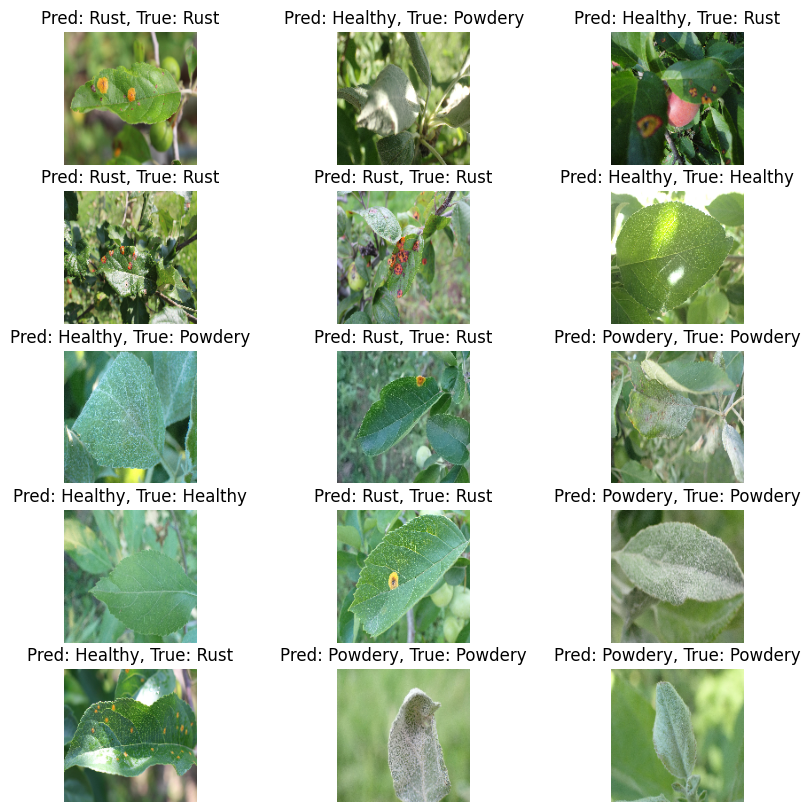

In [10]:


# Retrieve a batch of images from the test set
test_images, test_labels = next(tst_data)
predictions = model.predict(test_images)
res_dic = ['Healthy','Powdery','Rust']

plt.figure(figsize=(10, 10))
for i in range(15):
    plt.subplot(5,3 , i + 1)
    plt.imshow(test_images[i])
    plt.title(f"Pred: {res_dic[np.argmax(predictions[i])]}, True: {res_dic[np.argmax(test_labels[i])]}")
    plt.axis('off')
plt.show()


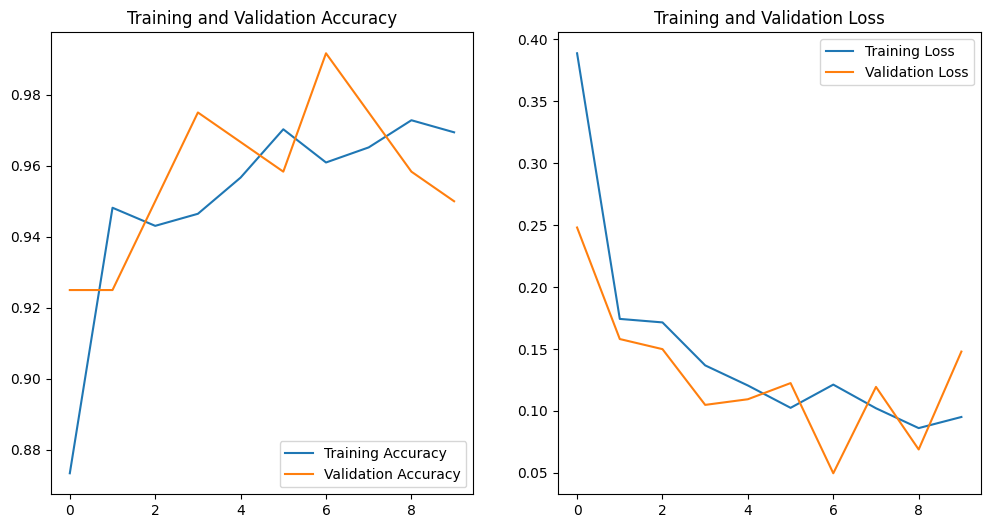

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
